In [80]:
from diagrams import Diagram, Cluster
from diagrams.onprem.vcs import Github
from diagrams.onprem.workflow import Airflow
from diagrams.custom import Custom
from diagrams.saas.analytics import Snowflake
from diagrams.onprem.container import Docker

# Paths to custom icons
langchain_logo = "input_icons/langchain.png"
pinecone_logo = "input_icons/pinecone.png"
docs_logo = "input_icons/docs.png"
bsoup_logo = "input_icons/bs.png"
python_logo = "input_icons/python.png"
openai_logo = "input_icons/OpenAI.png"
data_combine_logo = "input_icons/python.png"
all_other_logo = "input_icons/all_other_files.png"
md_logo = "input_icons/md.png"
ipynb_logo = "input_icons/ipynb.png"
github_actions_logo = "input_icons/github_actions.png"

with Diagram("Backend Airflow Pipeline with LangChain, Pinecone, and GitHub Actions", show=False) as diag:

    # GitHub Actions outside the main cluster
    github_actions = Custom("GitHub Actions\n(CI/CD)", github_actions_logo)

    # Main cluster for backend workflow
    with Cluster("Airflow Orchestrated Workflow"):
        airflow = Airflow("Airflow Orchestrator")

        # Documentation processing
        with Cluster("Documentation Processing"):
            docs = Custom("Documentation Pages", docs_logo)
            langchain = Custom("LangChain\n(Scraping)", langchain_logo)
            bsoup = Custom("Beautiful Soup\n(Parsing)", bsoup_logo)
            python_process_docs = Custom("Python Processing", python_logo)
            docs >> langchain >> bsoup >> python_process_docs

        # GitHub processing
        with Cluster("GitHub Processing"):
            github_repos = Github("GitHub Repositories")
            parse_py = Custom("Parse\n.py Files", python_logo)
            parse_md = Custom("Parse\n.md Files", md_logo)
            parse_ipynb = Custom("Parse\n.ipynb Files", ipynb_logo)
            parse_all_other_files = Custom("Parse\nall other Files", all_other_logo)
            github_combined = Custom("Combine\nGitHub Data", data_combine_logo)
            github_repos >> [parse_py, parse_md, parse_ipynb, parse_all_other_files] >> github_combined

        # Combined processing
        combined_data = Custom("Combine Docs\n& GitHub Data", data_combine_logo)

        # Storage and embeddings
        with Cluster("Storage and Embeddings"):
            structured_content = Snowflake("Snowflake\n(Structured Data)")
            openai_embedding = Custom("OpenAI\nEmbedding", openai_logo)
            pinecone = Custom("Pinecone\nVector Store", pinecone_logo)

        # Combine documentation and GitHub data
        [python_process_docs, github_combined] >> combined_data

        # Combined data to storage and embeddings
        combined_data >> structured_content
        combined_data >> openai_embedding >> pinecone

    docker = Docker("Docker Container")

    # Connect GitHub Actions to the workflow
    github_actions >> airflow

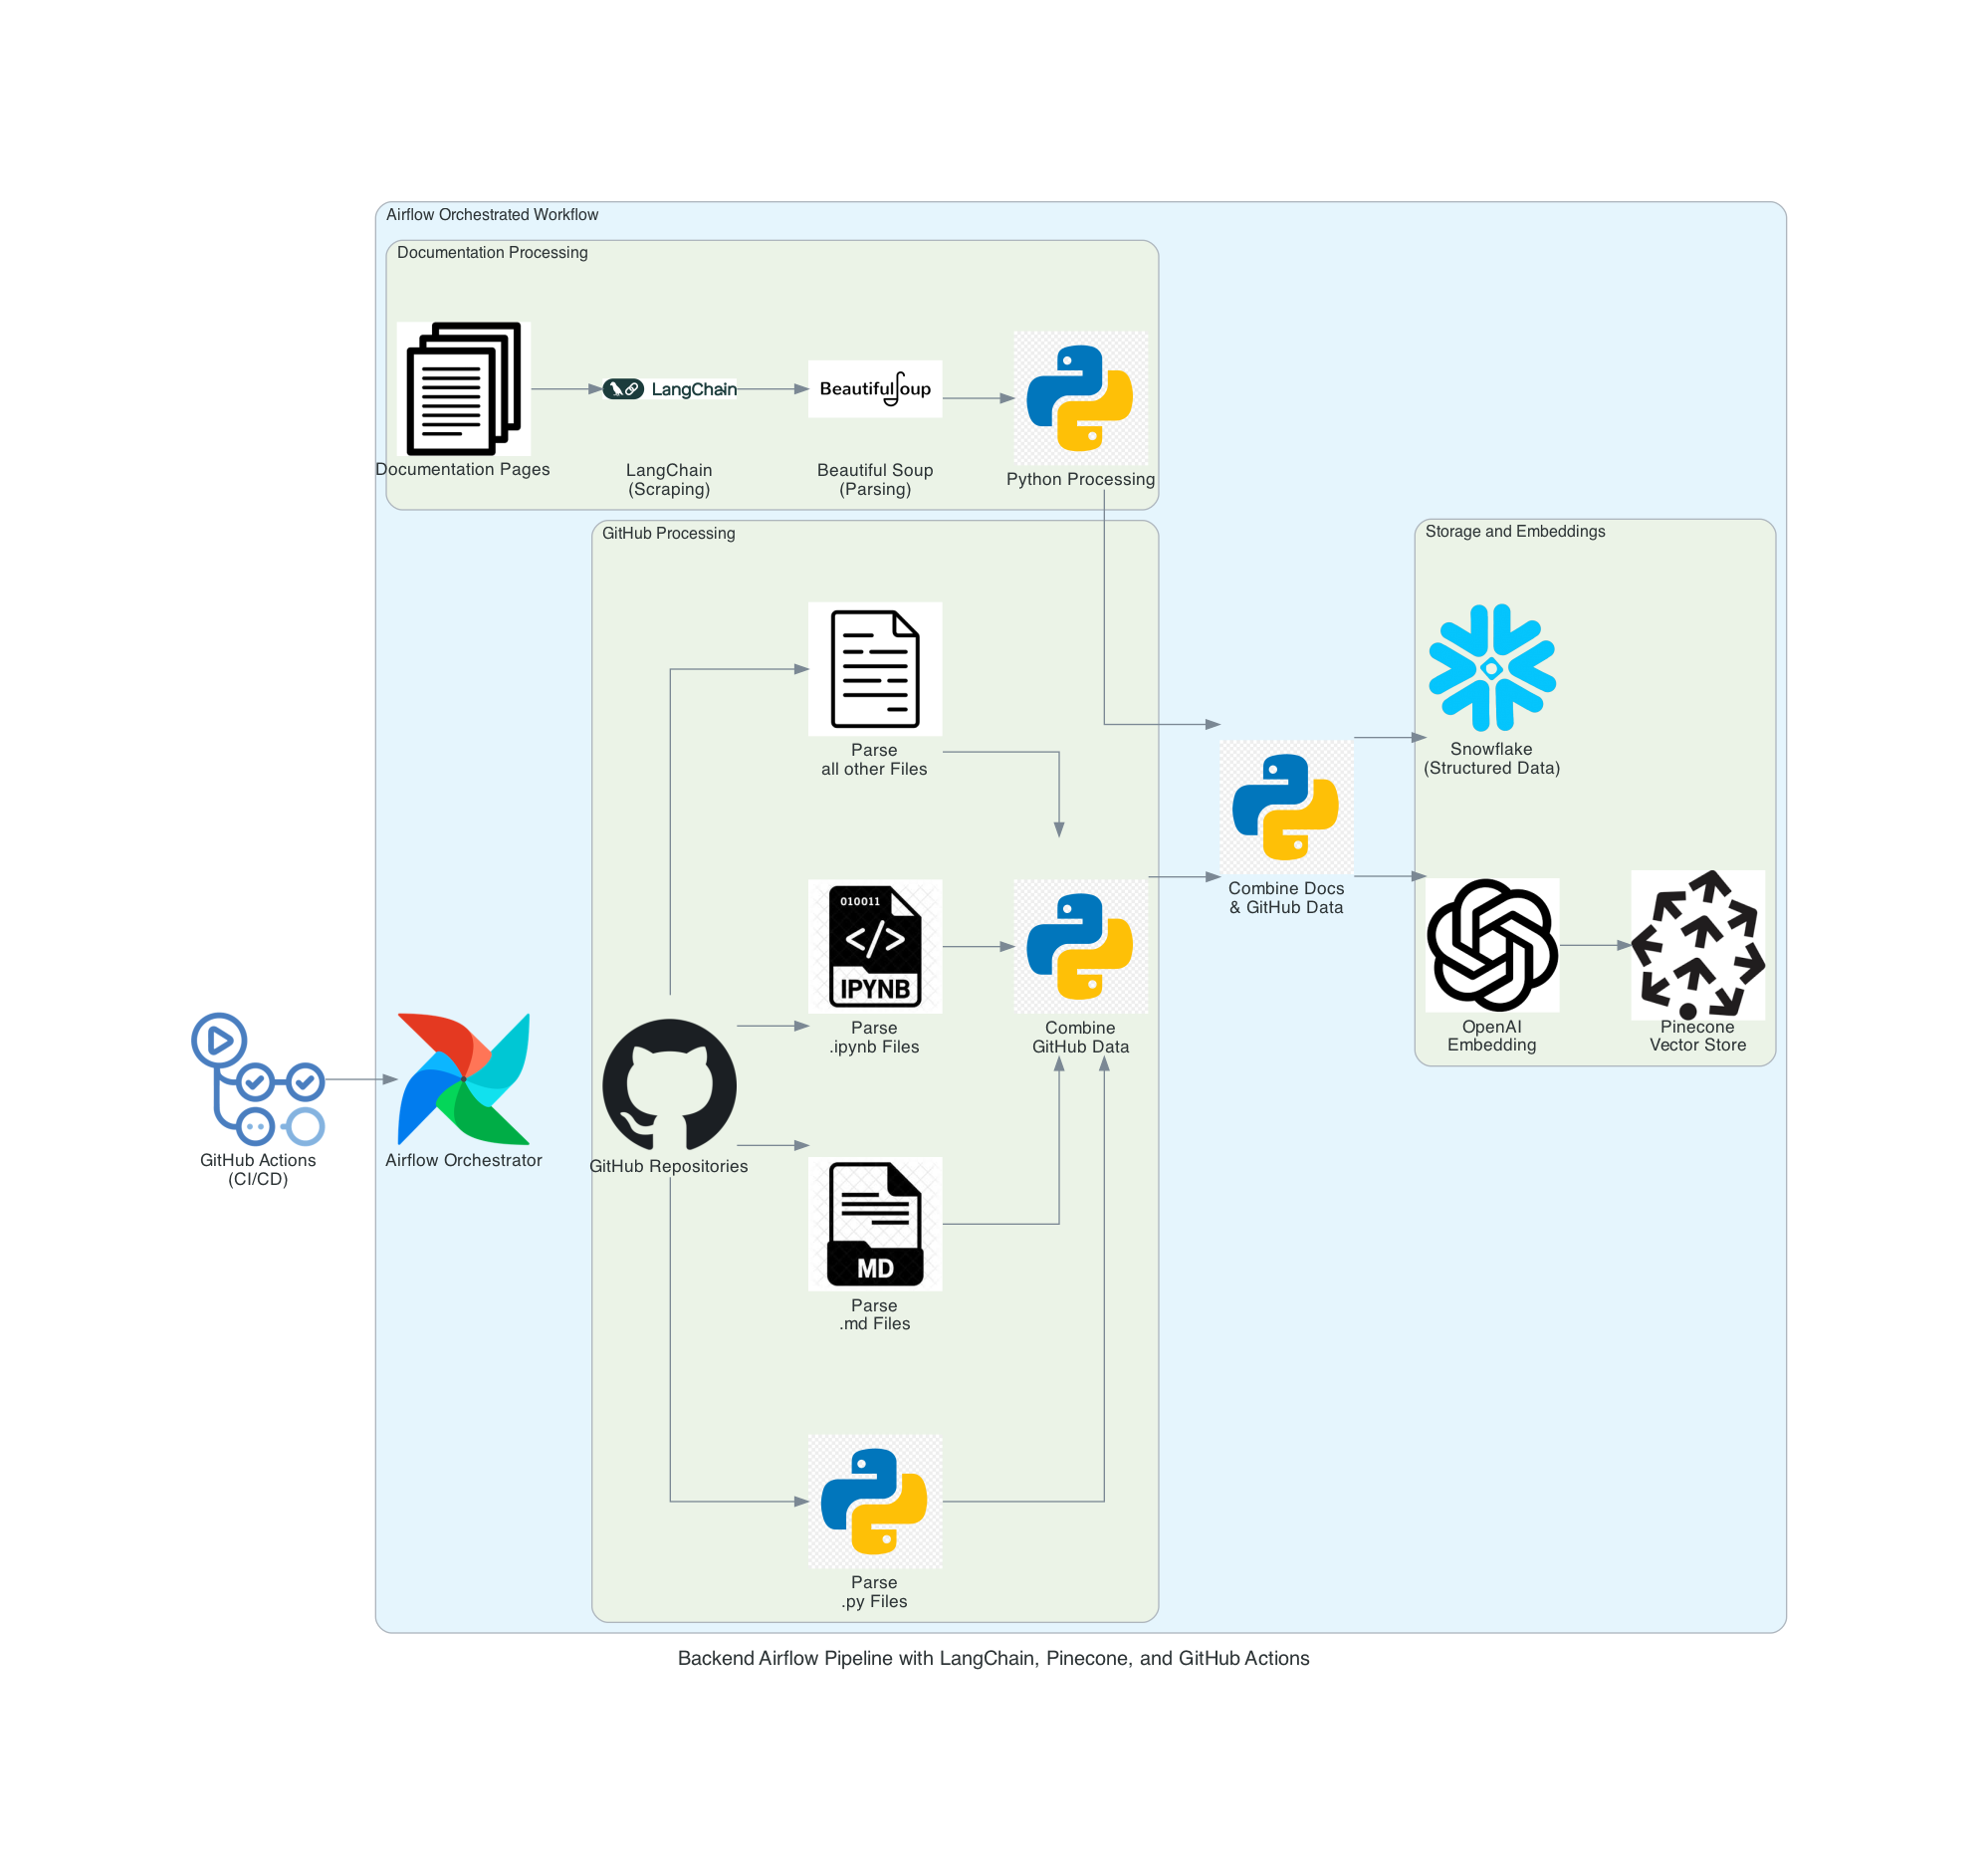

In [78]:
diag

In [3]:
from diagrams import Diagram, Cluster, Edge
from diagrams.custom import Custom
from diagrams.onprem.client import User
from diagrams.programming.framework import FastAPI
from diagrams.onprem.vcs import Github

# Define the icons for custom nodes
user_icon = "input_icons/user.png" 
streamlit_icon = "input_icons/streamlit.png"  
jwt_icon = "input_icons/jwt.png"  
snowflake_icon = "input_icons/snowflake.png" 
langgraph_icon = "input_icons/langgraph.png"
github_actions_icon = "input_icons/github_actions.png"

with Diagram("User Interaction with FastAPI Endpoints", show=False) as diag:
    # User node (outside the cluster)
    user = Custom("User", user_icon) if user_icon else User("User")

    # GitHub Actions node (outside the cluster)
    github_actions = Custom("GitHub Actions\n(CI/CD)", github_actions_icon)

    # Docker container for backend
    with Cluster("Docker Container"):
        # Streamlit node
        streamlit = Custom("Streamlit", streamlit_icon) if streamlit_icon else Custom("Streamlit", streamlit_icon)

        # FastAPI node
        fastapi = FastAPI("FastAPI Endpoint")

        # FastAPI Endpoint Cluster
        with Cluster("FastAPI Endpoints"):
            snowflake = Custom("Snowflake User Details", snowflake_icon)
            jwt_auth = Custom("JWT Authentication", jwt_icon)
            langgraph_agent_1 = Custom("Code Generation Agent", langgraph_icon)
            langgraph_agent_2 = Custom("SQL Agent", langgraph_icon)
            langgraph_agent_3 = Custom("Web Search Agent", langgraph_icon)
            github_repo = Github("GitHub Repo")

        # Workflow connections within Docker
        streamlit >> fastapi
        fastapi >> Edge(label="Fetch User Details") >> snowflake
        fastapi >> Edge(label="Validate User") >> jwt_auth
        fastapi >> Edge(label="Code Generation") >> langgraph_agent_1
        fastapi >> Edge(label="SQL Queries") >> langgraph_agent_2
        fastapi >> Edge(label="Web Search") >> langgraph_agent_3
        fastapi >> Edge(label="Push Guide to Repo") >> github_repo

    # User connects to Streamlit
    user >> streamlit

    # GitHub Actions connects to Docker
    github_actions >> Edge(label="Build & Deploy") >> streamlit


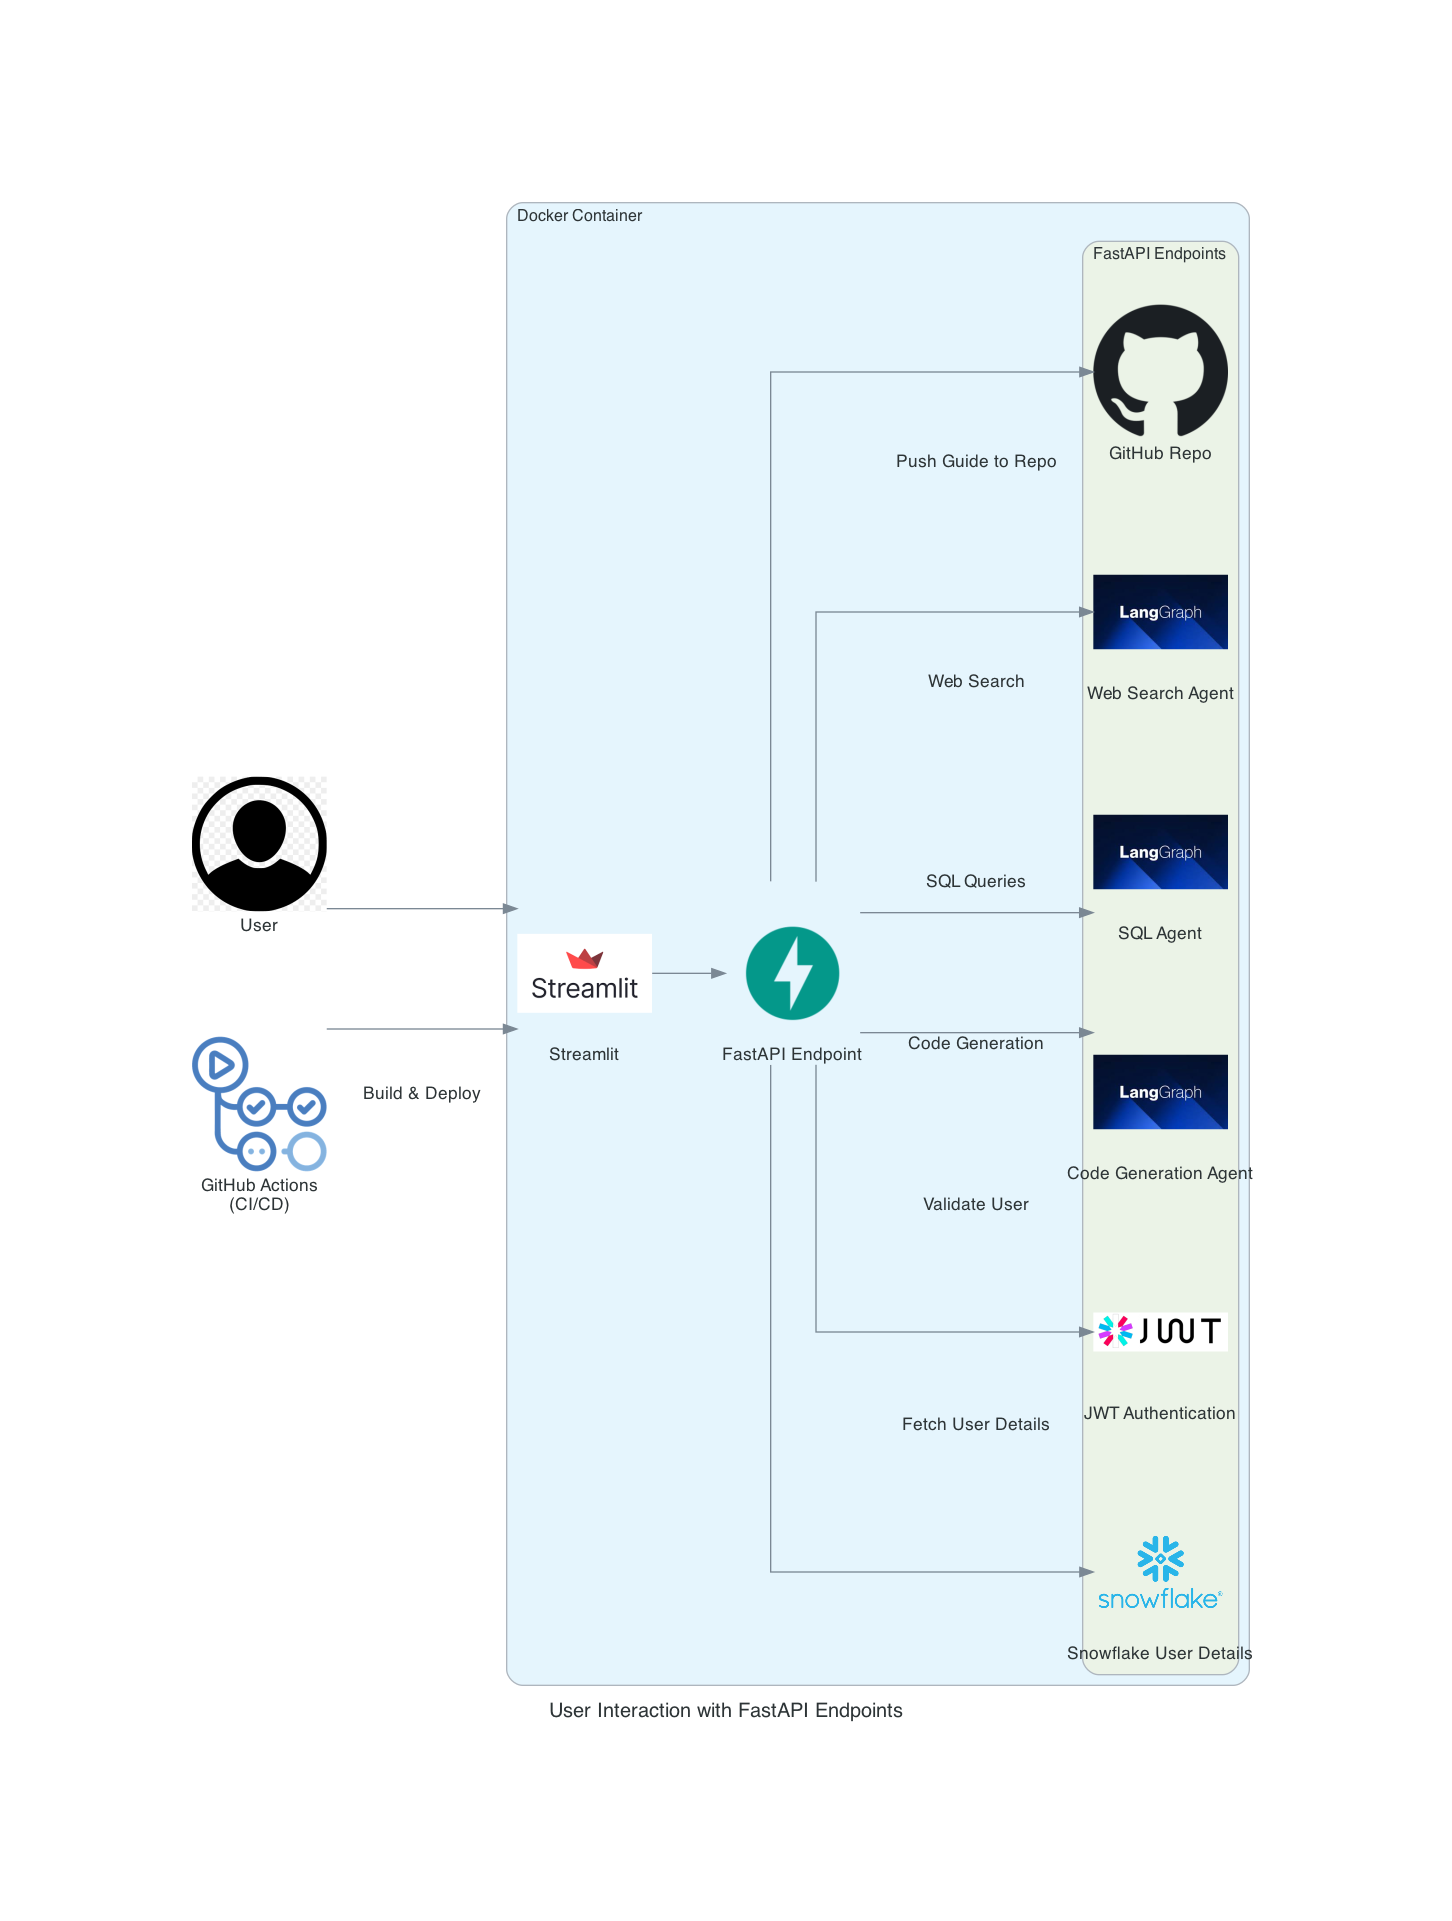

In [5]:
diag

In [1]:
from diagrams import Diagram, Cluster, Edge
from diagrams.custom import Custom
from diagrams.onprem.client import User
from diagrams.onprem.workflow import Airflow
from diagrams.onprem.vcs import Github
from diagrams.programming.framework import FastAPI
from diagrams.saas.analytics import Snowflake
from diagrams.onprem.container import Docker

# Define custom icons
icons = {
    "langchain": "input_icons/langchain.png",
    "pinecone": "input_icons/pinecone.png",
    "docs": "input_icons/docs.png",
    "bsoup": "input_icons/bs.png",
    "python": "input_icons/python.png",
    "openai": "input_icons/OpenAI.png",
    "data_combine": "input_icons/python.png",
    "all_other_files": "input_icons/all_other_files.png",
    "md": "input_icons/md.png",
    "ipynb": "input_icons/ipynb.png",
    "github_actions": "input_icons/github_actions.png",
    "streamlit": "input_icons/streamlit.png",
    "jwt": "input_icons/jwt.png",
    "langgraph": "input_icons/langgraph.png",
    "user": "input_icons/user.png"
}

with Diagram("Combined Frontend and Backend Pipeline", show=False):
    # GitHub Actions for CI/CD
    github_actions = Custom("GitHub Actions\n(CI/CD)", icons["github_actions"])

    # Airflow Pipeline Cluster
    with Cluster("Airflow Pipeline"):
        airflow = Airflow("Airflow Orchestrator")

        # Documentation Processing
        with Cluster("Documentation Processing"):
            docs = Custom("Documentation Pages", icons["docs"])
            langchain = Custom("LangChain\n(Scraping)", icons["langchain"])
            bsoup = Custom("Beautiful Soup\n(Parsing)", icons["bsoup"])
            python_process_docs = Custom("Python Processing", icons["python"])
            docs >> langchain >> bsoup >> python_process_docs

        # GitHub Processing
        with Cluster("GitHub Processing"):
            github_repos = Github("GitHub Repositories")
            parse_py = Custom("Parse\n.py Files", icons["python"])
            parse_md = Custom("Parse\n.md Files", icons["md"])
            parse_ipynb = Custom("Parse\n.ipynb Files", icons["ipynb"])
            parse_all_other_files = Custom("Parse\nall other Files", icons["all_other_files"])
            github_combined = Custom("Combine\nGitHub Data", icons["data_combine"])
            github_repos >> [parse_py, parse_md, parse_ipynb, parse_all_other_files] >> github_combined

        combined_data = Custom("Combine Docs\n& GitHub Data", icons["data_combine"])

        # Storage and Embedding Cluster
        with Cluster("Storage and Embeddings"):
            structured_content = Snowflake("Snowflake\n(Structured Data)")
            openai_embedding = Custom("OpenAI\nEmbedding", icons["openai"])
            pinecone = Custom("Pinecone\nVector Store", icons["pinecone"])

        # Combine Airflow Outputs
        [python_process_docs, github_combined] >> combined_data
        combined_data >> [structured_content, openai_embedding >> pinecone]

    # Docker Cluster for Backend
    with Cluster("Backend Services in Docker"):
        # Streamlit Frontend
        streamlit = Custom("Streamlit", icons["streamlit"])
        fastapi = FastAPI("FastAPI Endpoint")

        # FastAPI Endpoints Cluster
        with Cluster("FastAPI Endpoints"):
            snowflake = Snowflake("Snowflake User Details")
            jwt_auth = Custom("JWT Authentication", icons["jwt"])
            langgraph_agent_1 = Custom("Code Generation Agent", icons["langgraph"])
            langgraph_agent_2 = Custom("SQL Agent", icons["langgraph"])
            langgraph_agent_3 = Custom("Web Search Agent", icons["langgraph"])
            github_repo = Github("GitHub Repo")

        # Backend Workflow Connections
        streamlit >> fastapi
        fastapi >> [snowflake, jwt_auth, langgraph_agent_1, langgraph_agent_2, langgraph_agent_3, github_repo]

    # User Interaction
    user = Custom("User", icons["user"])
    user >> streamlit

    # Connect GitHub Actions to Clusters
    github_actions >> [airflow, streamlit]


In [25]:
from diagrams import Diagram, Cluster, Edge
from diagrams.custom import Custom
from diagrams.onprem.client import User
from diagrams.onprem.workflow import Airflow
from diagrams.onprem.vcs import Github
from diagrams.programming.framework import FastAPI
from diagrams.saas.analytics import Snowflake
from diagrams.onprem.container import Docker

# Define custom icons
icons = {
    "langchain": "input_icons/langchain.png",
    "pinecone": "input_icons/pinecone.png",
    "docs": "input_icons/docs.png",
    "bsoup": "input_icons/bs.png",
    "python": "input_icons/python.png",
    "openai": "input_icons/OpenAI.png",
    "data_combine": "input_icons/python.png",
    "all_other_files": "input_icons/all_other_files.png",
    "md": "input_icons/md.png",
    "ipynb": "input_icons/ipynb.png",
    "github_actions": "input_icons/github_actions.png",
    "streamlit": "input_icons/streamlit.png",
    "jwt": "input_icons/jwt.png",
    "langgraph": "input_icons/langgraph.png",
    "user": "input_icons/user.png"
}

with Diagram("Combined Frontend and Backend Pipeline with Docker", show=False ):
    # GitHub Actions for CI/CD
    github_actions = Custom("GitHub Actions\n(CI/CD)", icons["github_actions"])

    # Docker Cluster for Airflow Pipeline
    with Cluster("Airflow Pipeline in Docker"):
        docker_airflow = Docker("Airflow Docker")
        airflow = Airflow("Airflow Orchestrator")

        # Documentation Processing
        with Cluster("Documentation Processing"):
            docs = Custom("Documentation Pages", icons["docs"])
            langchain = Custom("LangChain\n(Scraping)", icons["langchain"])
            bsoup = Custom("Beautiful Soup\n(Parsing)", icons["bsoup"])
            python_process_docs = Custom("Python Processing", icons["python"])
            docs >> langchain >> bsoup >> python_process_docs

        # GitHub Processing
        with Cluster("GitHub Processing"):
            github_repos = Github("GitHub Repositories")
            parse_py = Custom("Parse\n.py Files", icons["python"])
            parse_md = Custom("Parse\n.md Files", icons["md"])
            parse_ipynb = Custom("Parse\n.ipynb Files", icons["ipynb"])
            parse_all_other_files = Custom("Parse\nall other Files", icons["all_other_files"])
            github_combined = Custom("Combine\nGitHub Data", icons["data_combine"])
            github_repos >> [parse_py, parse_md, parse_ipynb, parse_all_other_files] >> github_combined

        combined_data = Custom("Combine Docs\n& GitHub Data", icons["data_combine"])

        # Storage and Embedding Cluster
        with Cluster("Storage and Embeddings"):
            structured_content = Snowflake("Snowflake\n(Structured Data)")
            openai_embedding = Custom("OpenAI\nEmbedding", icons["openai"])
            pinecone = Custom("Pinecone\nVector Store", icons["pinecone"])

        # Combine Airflow Outputs
        [python_process_docs, github_combined] >> combined_data
        combined_data >> [structured_content, openai_embedding >> pinecone]

    docker_airflow >> airflow  # Connect Docker to Airflow

    # Docker Cluster for Backend
    with Cluster("Backend Services in Docker"):
        docker_streamlit = Docker("Streamlit Docker")
        # Streamlit Frontend
        streamlit = Custom("Streamlit", icons["streamlit"])
        fastapi = FastAPI("FastAPI Endpoint")

        # FastAPI Endpoints Cluster
        with Cluster("FastAPI Endpoints"):
            snowflake = Snowflake("Snowflake User Details")
            jwt_auth = Custom("JWT Authentication", icons["jwt"])
            langgraph_agent_1 = Custom("Code Generation Agent", icons["langgraph"])
            langgraph_agent_2 = Custom("SQL Agent", icons["langgraph"])
            langgraph_agent_3 = Custom("Web Search Agent", icons["langgraph"])
            github_repo = Github("GitHub Repo")

        # Backend Workflow Connections
        streamlit >> fastapi
        fastapi >> [snowflake, jwt_auth, langgraph_agent_1, langgraph_agent_2, langgraph_agent_3, github_repo]

    docker_streamlit >> streamlit  # Connect Docker to Streamlit

    # User Interaction
    user = Custom("User", icons["user"])
    user >> streamlit

    # Connect GitHub Actions to Docker Clusters
    github_actions >> docker_airflow >> airflow
    github_actions >> docker_streamlit >> streamlit


In [28]:
with Diagram(
    "Combined Frontend and Backend Pipeline with Docker",
    show=False,
    outformat="png",
    filename="reduced_height_diagram",
    graph_attr={"dpi": "200", "size": "12,3"}  # Wide layout with reduced height
):
    # GitHub Actions for CI/CD
    github_actions = Custom("GitHub Actions\n(CI/CD)", icons["github_actions"])

    # Docker Cluster for Airflow Pipeline
    with Cluster("Airflow Pipeline in Docker"):
        docker_airflow = Docker("Airflow Docker")
        airflow = Airflow("Airflow Orchestrator")

        # Documentation Processing
        with Cluster("Documentation Processing"):
            docs = Custom("Documentation Pages", icons["docs"])
            langchain = Custom("LangChain\n(Scraping)", icons["langchain"])
            bsoup = Custom("Beautiful Soup\n(Parsing)", icons["bsoup"])
            python_process_docs = Custom("Python Processing", icons["python"])
            docs >> langchain >> bsoup >> python_process_docs

        # GitHub Processing
        with Cluster("GitHub Processing"):
            github_repos = Github("GitHub Repositories")
            parse_py = Custom("Parse\n.py Files", icons["python"])
            parse_md = Custom("Parse\n.md Files", icons["md"])
            parse_ipynb = Custom("Parse\n.ipynb Files", icons["ipynb"])
            parse_all_other_files = Custom("Parse\nall other Files", icons["all_other_files"])
            github_combined = Custom("Combine\nGitHub Data", icons["data_combine"])
            github_repos >> [parse_py, parse_md, parse_ipynb, parse_all_other_files] >> github_combined

        combined_data = Custom("Combine Docs\n& GitHub Data", icons["data_combine"])

        # Storage and Embedding Cluster
        with Cluster("Storage and Embeddings"):
            structured_content = Snowflake("Snowflake\n(Structured Data)")
            openai_embedding = Custom("OpenAI\nEmbedding", icons["openai"])
            pinecone = Custom("Pinecone\nVector Store", icons["pinecone"])

        # Combine Airflow Outputs
        [python_process_docs, github_combined] >> combined_data
        combined_data >> [structured_content, openai_embedding >> pinecone]

    docker_airflow >> airflow  # Connect Docker to Airflow

    # Docker Cluster for Backend
    with Cluster("Backend Services in Docker"):
        docker_streamlit = Docker("Streamlit Docker")
        # Streamlit Frontend
        streamlit = Custom("Streamlit", icons["streamlit"])
        fastapi = FastAPI("FastAPI Endpoint")

        # FastAPI Endpoints Cluster
        with Cluster("FastAPI Endpoints"):
            snowflake = Snowflake("Snowflake User Details")
            jwt_auth = Custom("JWT Authentication", icons["jwt"])
            langgraph_agent_1 = Custom("Code Generation Agent", icons["langgraph"])
            langgraph_agent_2 = Custom("SQL Agent", icons["langgraph"])
            langgraph_agent_3 = Custom("Web Search Agent", icons["langgraph"])
            github_repo = Github("GitHub Repo")

        # Backend Workflow Connections
        streamlit >> fastapi
        fastapi >> [snowflake, jwt_auth, langgraph_agent_1, langgraph_agent_2, langgraph_agent_3, github_repo]

    docker_streamlit >> streamlit  # Connect Docker to Streamlit

    # User Interaction
    user = Custom("User", icons["user"])
    user >> streamlit

    # Connect GitHub Actions to Docker Clusters
    github_actions >> docker_airflow >> airflow
    github_actions >> docker_streamlit >> streamlit
